In [10]:
import pandas as pd
from baseline.data import load_data

data_file = "models/mobility_agent/mobility_agent_0.csv"
data_df = pd.read_csv(data_file)

# data_file = "data/reference/replica-cambridge_trips.csv"
# data_df = load_data(data_file)

data_df.head()

,Unnamed: 0,person_id,age,gender,employment_status,household_size,household_income,available_vehicles,industry,education,trip_purpose,start_time,primary_mode,duration_minutes,age_group,income_group,predicted_mode,predicted_duration,selection_reason,choice_weights
0,0,14941376504966255761,16,male,not_in_labor_force,4,140343,two,not_working,k_12,eat,14,walking,10-20,Under 18,$100k-$150k,private_auto,10-20,"[""As a young individual with access to two veh...","[{""primary_mode"": ""private_auto"", ""duration_mi..."
1,1,741506727884677094,60,male,employed,1,37850,one,naics445110,bachelors_degree,eat,14,walking,50-60,55-64,$10k-$50k,walking,30-40,"[""As a 55-64 year old employed individual with...","[{""primary_mode"": ""private_auto"", ""duration_mi..."
2,2,5066275312758875498,17,male,employed,4,776722,three_plus,naics31_33,k_12,work,12,biking,0-10,Under 18,$300k+,public_transit,40-50,"[""As a young, employed individual with a high ...","[{""primary_mode"": ""private_auto"", ""duration_mi..."
3,3,11838005633882312749,69,female,employed,2,92736,two,naics621492,advanced_degree,home,22,auto_passenger,10-20,65+,$50k-$100k,private_auto,30-40,"[""I prefer driving my own car because it's mor...","[{""primary_mode"": ""private_auto"", ""duration_mi..."
4,4,813905790027797463,20,male,not_in_labor_force,1,0,unknown_num_vehicles,not_working,some_college,home,19,walking,10-20,18-24,Under $10k,walking,0-10,"[""I'm in the 18-24 age group with some college...","[{""primary_mode"": ""walking"", ""duration_minutes..."


In [11]:
# Remove the trailing comma to make this a proper list
primary_mode_list = ['walking', 'biking', 'auto_passenger', 'public_transit','private_auto', 'on_demand_auto','other_travel_mode']
duration_minutes_list = ['0-10','10-20', '20-30', '30-40', '40-50', '50-60']

# Filter the dataframe with valid output
data_df = data_df[data_df['predicted_mode'].isin(primary_mode_list)]
data_df = data_df[data_df['predicted_duration'].isin(duration_minutes_list)]
print(len(data_df))

983


In [14]:
# plot_columns = ['age_group','income_group','gender','employment_status','household_size','available_vehicles','education','trip_purpose','start_time','primary_mode','duration_minutes','predicted_mode','predicted_duration']

plot_columns = ['age_group','income_group','gender','employment_status','household_size','available_vehicles','education','trip_purpose','start_time']

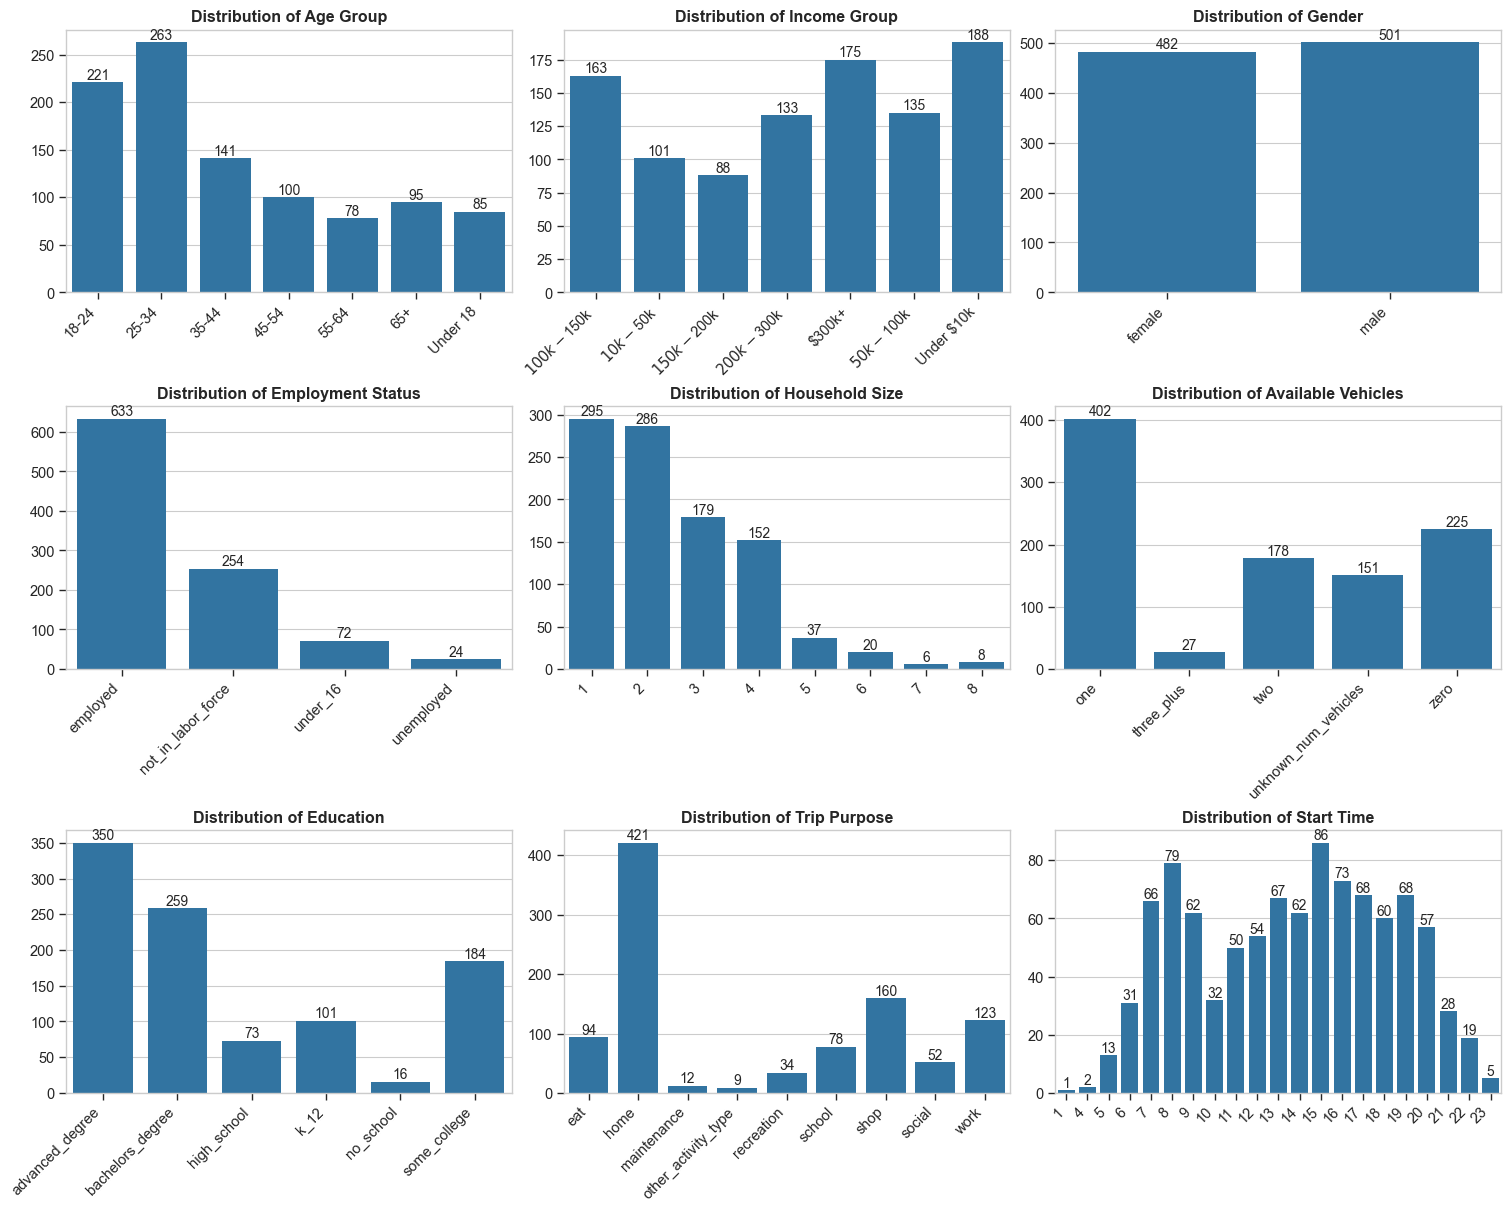

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置学术风格的图表
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper", font_scale=1.2)

# 创建足够大的图表以展示所有分布
fig, axes = plt.subplots(3, 3, figsize=(15, 12), constrained_layout=True)
axes = axes.flatten()

# 为每个分类变量创建可视化
for i, col in enumerate(plot_columns):
    # 计算分布
    value_counts = data_df[col].value_counts().sort_index()
    
    # 创建条形图
    ax = axes[i]
    bars = sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax)
    
    # 添加数值标签
    for p in bars.patches:
        ax.annotate(f'{int(p.get_height())}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'bottom',
                   fontsize=10)
    
    # 设置标题和标签
    ax.set_title(f'Distribution of {col.replace("_", " ").title()}', fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    # 旋转x轴标签以增强可读性
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# 显示图表
plt.show()

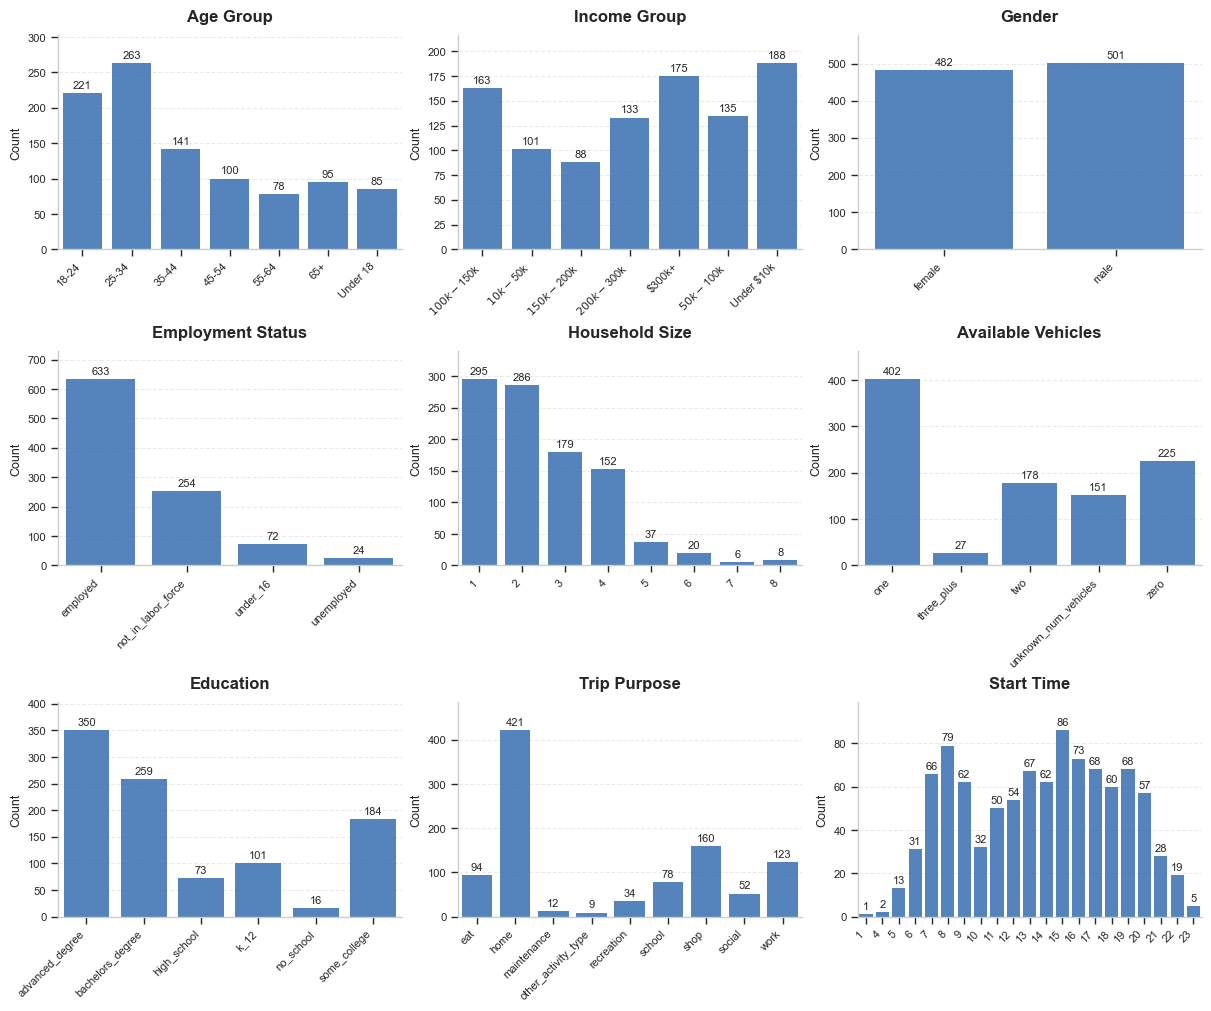

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置学术风格的图表参数
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper", font_scale=1.2, rc={
    "font.family": "serif",
    "font.serif": ["Times", "Palatino", "Georgia"],
    "text.usetex": False,
    "axes.titlesize": 12,
    "axes.labelsize": 10,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
})

# 创建图表
fig, axes = plt.subplots(3, 3, figsize=(12, 10), constrained_layout=True)
axes = axes.flatten()

# 设置统一的颜色 - 选择学术风格的蓝色
UNIFIED_COLOR = '#1565C0'  # 适度的蓝色，学术风格
ALPHA = 0.8  # 透明度

# 为每个分类变量创建可视化
for i, col in enumerate(plot_columns):
    # 计算分布
    value_counts = data_df[col].value_counts().sort_index()
    
    # 创建条形图 - 使用统一颜色
    ax = axes[i]
    bars = sns.barplot(x=value_counts.index, y=value_counts.values, 
                       ax=ax, color=UNIFIED_COLOR, alpha=ALPHA)
    
    # 添加数值标签
    for p in bars.patches:
        ax.annotate(f'{int(p.get_height())}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom',
                   fontsize=8, xytext=(0, 2),
                   textcoords='offset points')
    
    # 设置标题和标签
    ax.set_title(f'{col.replace("_", " ").title()}', 
                fontweight='bold', pad=10)
    ax.set_xlabel('')
    ax.set_ylabel('Count', fontsize=9)
    
    # 旋转x轴标签
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    
    # 移除顶部和右侧边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # 添加网格线(仅y轴方向)
    ax.yaxis.grid(True, linestyle='--', alpha=0.4)
    ax.xaxis.grid(False)
    
    # 调整y轴范围
    ax.set_ylim(0, value_counts.max() * 1.15)

# 显示图表
plt.show()